In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as ss

Text(0, 0.5, 'Frequency')

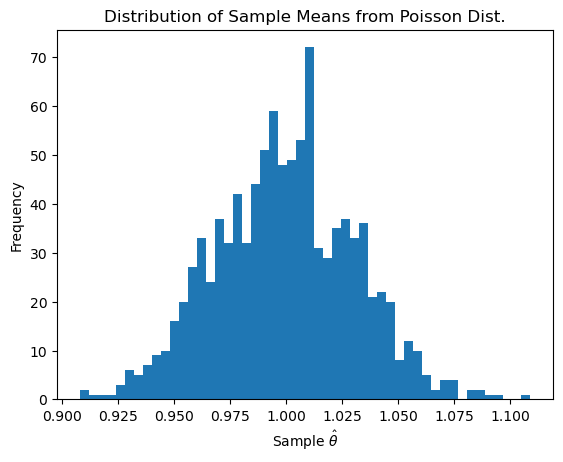

In [33]:
## Asymptotic Normality of Estimators 

sample_means = []
for i in range(1000):
    sample_mean = np.random.poisson(lam=1, size=1000).mean()
    sample_means.append(sample_mean)

plt.hist(sample_means, bins=50)
plt.title("Distribution of Sample Means from Poisson Dist.")
plt.xlabel(r"Sample $\hat\theta$")
plt.ylabel("Frequency")

0.6


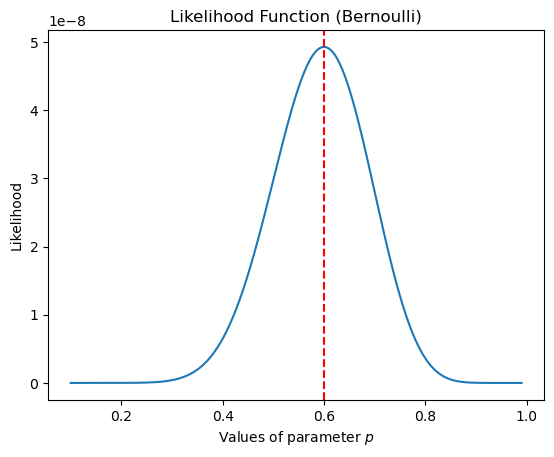

In [34]:
# Maximum of the Likelihood Function

def log_likelihood(p, data):
    l = p ** data.sum() * (1 - p) ** (len(data) - data.sum())
    return l

p = 0.55
data = ss.bernoulli.rvs(p, size=25)
p_bar = data.sum() / len(data)

parameter_space = np.linspace(0.1, 0.99, num=1000)
likelihoods = [log_likelihood(p_i, data) for p_i in parameter_space]
plt.plot(parameter_space, likelihoods)
plt.axvline(x = p_bar, color="red", linestyle="--")

plt.title("Likelihood Function (Bernoulli)")
plt.xlabel(r"Values of parameter $p$")
plt.ylabel("Likelihood")
print(p_bar)

<>:13: SyntaxWarning: invalid escape sequence '\h'
<>:13: SyntaxWarning: invalid escape sequence '\h'
/var/folders/4v/q1spznf91t36ybznjd9h0g480000gn/T/ipykernel_1199/102573436.py:13: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("Value of MLE Estimator $\hat p$")
/var/folders/4v/q1spznf91t36ybznjd9h0g480000gn/T/ipykernel_1199/102573436.py:6: RuntimeWarning: invalid value encountered in scalar divide
  pbar = sample.sum() / len(sample)


Text(0, 0.5, 'Value of MLE Estimator $\\hat p$')

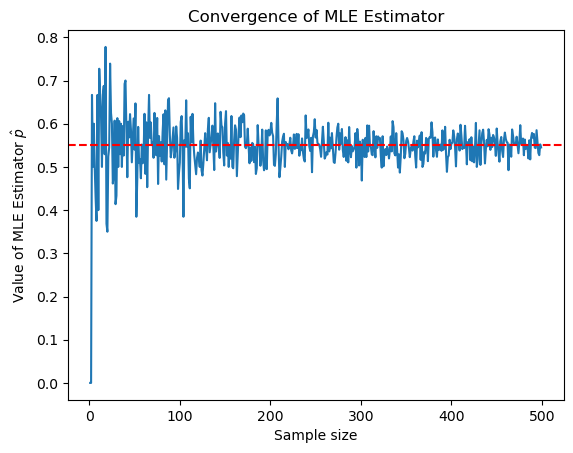

In [35]:
# convergence of MLE estimator
p_bar_list = []

for size in range(500):
    sample = ss.bernoulli.rvs(p, size=size)
    pbar = sample.sum() / len(sample)
    p_bar_list.append(pbar)

plt.plot(p_bar_list)
plt.axhline(y=p, color="red", linestyle="--")
plt.title("Convergence of MLE Estimator")
plt.xlabel(r"Sample size")
plt.ylabel("Value of MLE Estimator $\hat p$")

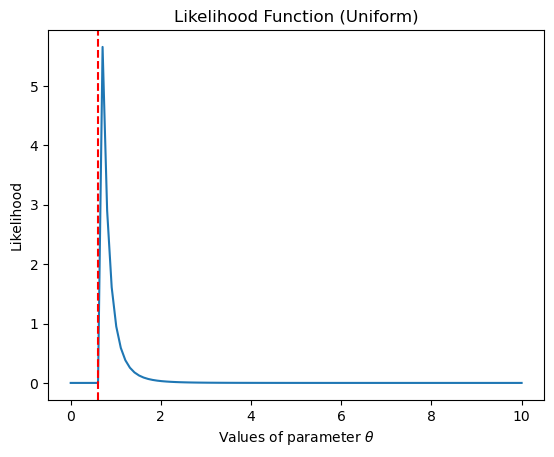

In [36]:
def L(theta, data):
    prod = 1
    for i in range(len(data)):
        if theta < data[i]:
            return 0
        else:
            prod *= 1 / theta
    
    return prod

data = np.random.uniform(0, 1, size=5)
parameter_space = np.linspace(0, 10, 100)
likelihoods = [L(parameter, data) for parameter in parameter_space]
plt.plot(parameter_space, likelihoods)

p_bar = max(data)
plt.title("Likelihood Function (Uniform)")
plt.xlabel(r"Values of parameter $\theta$")
plt.ylabel("Likelihood")
plt.axvline(p_bar, linestyle='--', color='r')


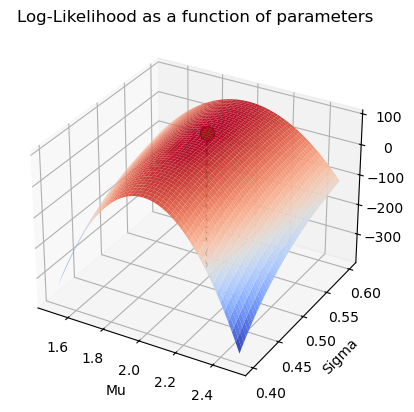

In [38]:
mu = 2
sigma = 0.5

data = np.random.normal(mu, sigma, size = 500)
N = len(data) 

x = np.linspace(1.5, 2.5, 50)
y = np.linspace(0.4, 0.6, 50)
X, Y = np.meshgrid(x, y)

Z = np.zeros_like(X)

sum_x2 = np.sum(data**2)
sum_x = np.sum(data)
sse = sum_x2 - 2 * X * sum_x + N * X**2

term_1 = -N * np.log(Y)
term_2 = sse / (2 * Y**2)
Z = term_1 - term_2

x_bar = data.sum() / N
s_bar = ((data - x_bar)**2).sum() / N
sigma_mle = np.sqrt(s_bar)
z_mle = -N * np.log(sigma_mle) - (N/2)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.scatter(x_bar, sigma_mle, z_mle, color='lime', s=100, label='MLE Estimate', edgecolors='black')
ax.plot([x_bar, x_bar], [sigma_mle, sigma_mle], [np.min(Z), z_mle], color='black', linestyle='--')
ax.set_xlabel('Mu')
ax.set_ylabel('Sigma')
plt.title("Log-Likelihood as a function of parameters")
plt.show()